## Final Project

- Main Questions:
We aim to understand the correlation between the timing of Twitter account creation and
the level of engagement regarding current events in the platform. This could help us determine
if certain world events, such as the COVID-19 pandemic or the #BLM movement, influenced the creation of new
accounts or if accounts created during specific periods are more active in discussing "hot topics".

- Data Resources:
We would be using the *acc_age* field, which represents the age of the accounts in days and
the verified status to measure credibility which potentially affects the account’s engagement
and reach. Additionally, by using the accounts’ creation date, we can categorize the accounts
by year and find in which year/period were created the highest number of accounts. This
could help us determine if accounts created during the pandemic were more engaged in
COVID-19 related tweets than older accounts or vice versa. Other relevant fields include
date, which indicates when each tweet was posted, allowing us to temporally analyze tweet
volume over time. Finally, we would have engagement metrics like rt rt count (retweet
count), rt reply count (reply count), and rt fav count (like count), which will help us measure
the influence and reach of the tweets from these accounts. By looking at these data fields, we
can understand how Twitter accounts created at different times contribute to the discourse
on COVID-19, exploring whether significant world events like the pandemic have increased
account creations or if these newly created accounts engage differently with the topic.
---------------------------------------------------------------------------------------------------------------------------------------------

## Plan

1. Find first occurrence of each hashtag and compare it to the first news article about the hate crimes
2. With acc_age and account_creation_date, create a time series analysis plot to assess how many accounts were created pre- and post- the first occurrence of the hashtag *#COVID* / *#BLM* / *#StopAsianHate* - answer the question **What is the relationship between the onset of these current events and the creation of twitter accounts?**
4. Create a time series analysis plot to assess the volume of tweets for each over time (assesing any relationship between tweeting and world events) - answer the question **What is the relationship between the onset of these current events and the volume of tweets?**
5. Use sentiment analysis to assess the sentiments of the tweets surrounding these current events - answer the question **What is the language of these tweets?**
6. Using the bot dictionary (Professor Chang is sending us a dictionary of bots) are any of these tweets - answer the question **How credible are the accounts tweeting about these current events?**
---------------------------------------------------------------------------------------------------------------------------------------------

### 00. Exploring the Data
What is the data we're looking at?

In [64]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob

#Insert YOUR path to data
# pickle = "/Users/emmanguyen/Downloads/BLM_StopAsianHate.pkl"
# data = pd.read_pickle(pickle)

#Insert YOUR path to data
with open('/Users/maccias/QSS20/QSS20_FinalProject/data/covid_sample-0.0001.pkl', 'rb') as f:
    data = pickle.load(f)

In [73]:
def ddmmyyyy(date):
    x = datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y')
    x = x.strftime('%Y-%m-%d')
    return x

data['date2'] = data['date'].apply(ddmmyyyy)
data['date2'] = pd.to_datetime(data['date2'], format='%Y-%m-%d')

In [74]:
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 189969 entries, 29075 to 9549
Data columns (total 77 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tweetid                189969 non-null  int64         
 1   userid                 189969 non-null  int64         
 2   screen_name            189969 non-null  object        
 3   date                   189969 non-null  object        
 4   lang                   189969 non-null  object        
 5   location               117714 non-null  object        
 6   place_id               1277 non-null    object        
 7   place_url              1277 non-null    object        
 8   place_type             1277 non-null    object        
 9   place_name             1277 non-null    object        
 10  place_full_name        1277 non-null    object        
 11  place_country_code     1273 non-null    object        
 12  place_country          1277 non-null    object 

,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,description,rt_user_description,qtd_user_description,acc_age,date2
29075,1440152419048955908,1389342585823584263,josephc14074803,Tue Sep 21 03:14:28 +0000 2021,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"A Grateful Dead Head, Not a head that's dead. ...",NaN,NaN,NaN,2021-09-21
17272,1347878795554918403,440160509,Iela_Strika,Sat Jan 09 12:12:01 +0000 2021,en,Malaysia--Pahang--Kuantan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-09
38446,1271326636760162304,1022641129655742467,YngShvy,Fri Jun 12 06:21:04 +0000 2020,en,Outerspace,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-12
16418,1279673408905756672,260230964,jennycoady10,Sun Jul 05 07:08:10 +0000 2020,en,"London, England",135989ad972a5d9d,https://api.twitter.com/1.1/geo/id/135989ad972...,city,Bromley,...,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-05
53175,1342267014686109701,281225798,certezamente,Fri Dec 25 00:32:49 +0000 2020,en,Portugal,NaN,NaN,NaN,NaN,...,NaN,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-25
78531,1406520004389003265,342937716,abuVeliki,Sun Jun 20 07:51:15 +0000 2021,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,read the fucking instructions | #freeAssange |...,"Stock market investor, occasionally distracted...",NaN,NaN,2021-06-20
116174,1469680656062025734,1442745694700326917,pisu_laura,Sat Dec 11 14:49:08 +0000 2021,it,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Il Signore è la mia forza,La pace è solo un'altra guerra combattuta in m...,NaN,74.0,2021-12-11
33404,1277969105451012097,824329582681669632,Michael9961,Tue Jun 30 14:15:52 +0000 2020,en,Nigeria,NaN,NaN,NaN,NaN,...,NaN,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30
126940,1486139877456596999,751469205166358528,Chris_V_C_M,Wed Jan 26 00:52:12 +0000 2022,en,"Ohio, USA",NaN,NaN,NaN,NaN,...,NaN,NaN,United States,NaN,NaN,"Wife, Mom, Nora Ephron & Tom Hanks fan. The on...",NaN,NaN,2027.0,2022-01-26
56312,1407210189393076241,3223330057,misterp___,Tue Jun 22 05:33:48 +0000 2021,th,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,หุ้นและการพนัน twitt เอามันส์ไม่เน้นสาระ เล่นห...,NaN,NaN,2021-06-22


### 01. Find first occurrence of each hashtag and compare it to the first news article about the hate crimes.

#### 01A. Exploring hashtags

For #stopasianhate, there are many variations of anti-asian racism occurences. We wanted to search to see the variations of anti-asian racism. For COVID-19, we found most hashtags contain "covid" or "coronavirus". For BLM, we chose "blm" and "blacklives".

In [155]:
def test(strList):
    x = pd.DataFrame(data[data["hashtag"].str.contains(strList, case = False, na = False)])
    dat = x[["hashtag", "date2", "text"]].sort_values(by = "date2").reset_index(drop=True)
    return pd.DataFrame(dat)

In [156]:
def tweet_v(dat):
    dat = dat.resample('D', on='date2').size().reset_index(name='tweet_count')
    return pd.DataFrame(dat)

In [157]:
def filtr(dat,start_date,end_date):
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    filtr_dat = dat[dat['date2'].between(start_date, end_date)]
    return pd.DataFrame(filtr_dat)

In [158]:
def sentiment(tweets):
    sentiments = tweets['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    return sentiments.mean()

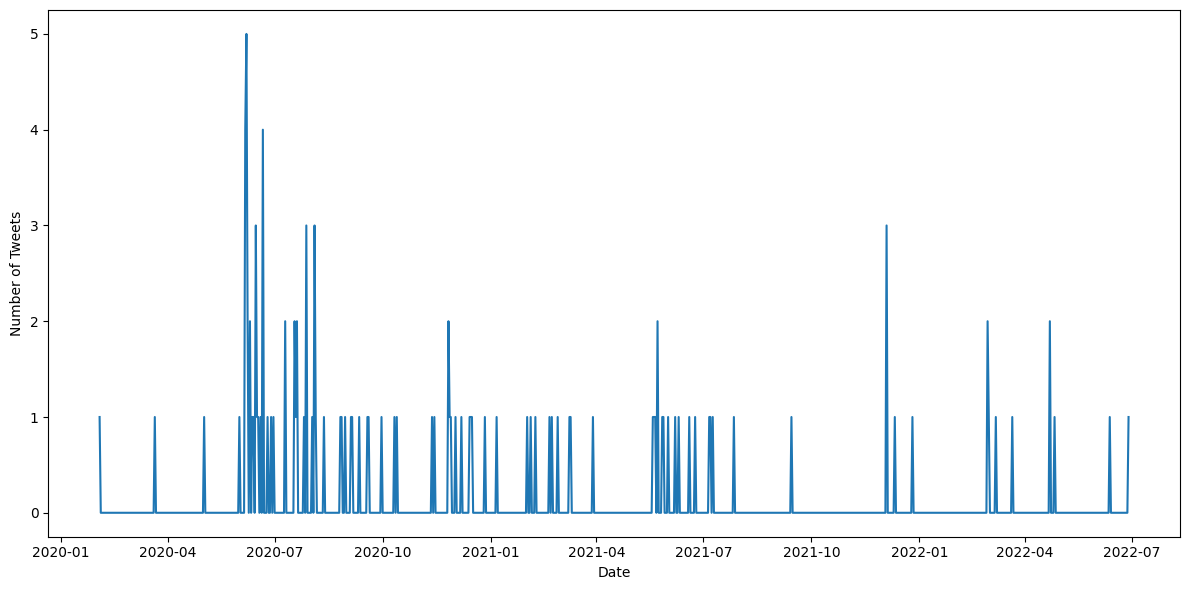

In [159]:
blm = test("black|blm|george floyd|derek chauvin")
testblm = tweet_v(blm)

# testblm = filtr(testblm,"2020-05-25","2020-06-20")

plt.figure(figsize=(12, 6))
plt.plot(testblm['date2'], testblm['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

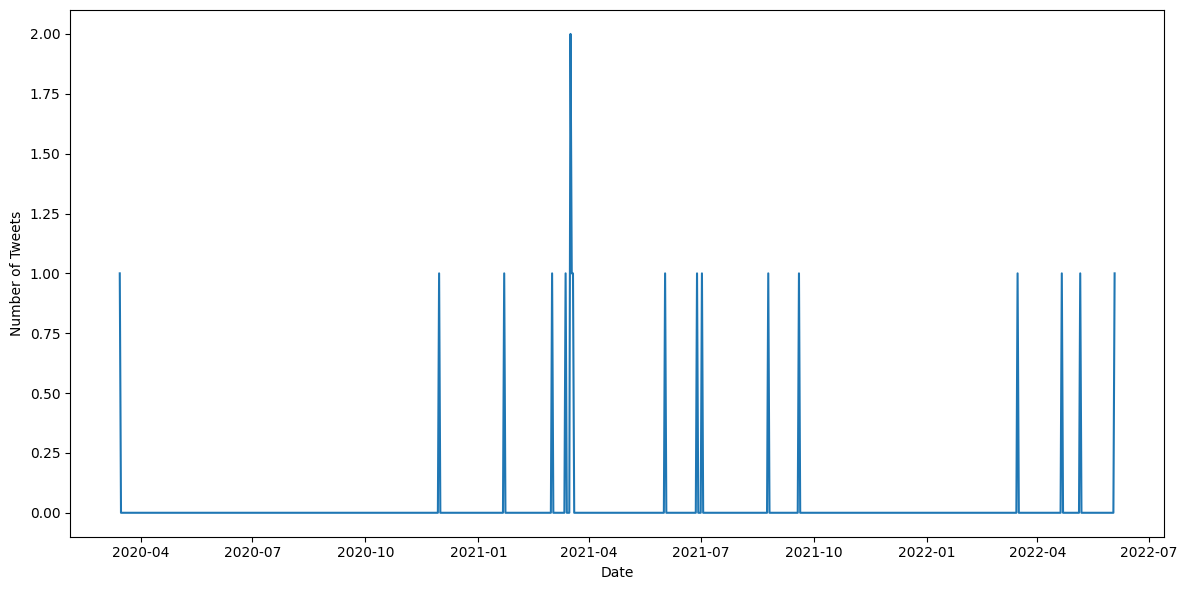

In [160]:
asian = test("asian|yellow|stopasianhate|stopaapihate")
testasian = tweet_v(asian)

# testasian = filtr(testasian,"2020-05-25","2020-06-20")

plt.figure(figsize=(12, 6))
plt.plot(testasian['date2'], testasian['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

        date2  tweet_count
37 2020-02-28           12
38 2020-02-29           54
39 2020-03-01           31
40 2020-03-02           11
41 2020-03-03           39


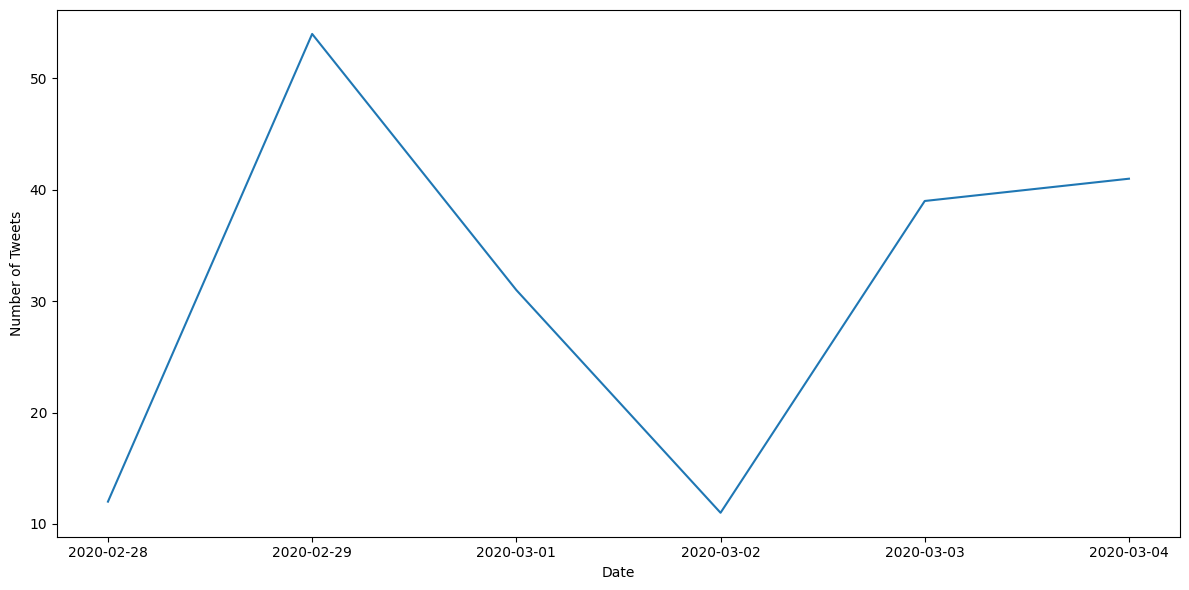

In [161]:
covid = test("covid|coronavirus|pandemic|pfizer|moderna|omicron variant|delta variant")
testcovid = tweet_v(covid)

testcovid = filtr(testcovid,"2020-02-28","2020-03-04")
print(testcovid.head())
plt.figure(figsize=(12, 6))
plt.plot(testcovid['date2'], testcovid['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

In [164]:
covid = filtr(covid,"2020-02-28","2021-05-06")

# Analyze sentiment
blm_sent = sentiment(blm)
asian_sent = sentiment(asian)
covid_sent = sentiment(covid)

blm_sent, asian_sent, covid_sent

(0.05740031370513827, 0.0493195847362514, 0.08244575567933181)

#### 01B. Defining a function to find the first occurrence within each hashtag subset

This variable will be used for comparison.

In [5]:
#hashtag: takes in a list of strings of hashtags
def first_hashtag(hashtag, df):

    #select cols and sort them by date
    sorted = df[["date", "text", "hashtag"]].sort_values(by = 'date')

    #df that contains tweets with the hashtags
    search_terms = "|".join(hashtag)
    terms_df = sorted[sorted['hashtag'].str.contains(search_terms, case = False, na = False)]
    
    #select just the first occurrence per day
    first_occurrences = terms_df.drop_duplicates(subset = 'hashtag', keep = 'first').reset_index()
    first_date = first_occurrences.iloc[0, 1]
    
    return first_date

In [6]:
blm_firstdate = first_hashtag(["blm", "blacklives"], data)
print(blm_firstdate)

covid_firstdate = first_hashtag(["covid", "coronavirus"], data)
print(covid_firstdate)

sah_firstdate = first_hashtag(["stopasianhate", "yellowlives", "asianlives"], data)
print(sah_firstdate)

2020-01-27 20:45:23+00:00
2020-01-23 12:29:56+00:00
2020-02-05 02:53:18+00:00


* First occurrence of #BLM-related hashtags: 2020-01-27 (January 27 2020)
* First occurrence of #COVID-19-related hashtage: 2020-01-23 (January 23 2020)
* First occurrence of #StopAsianHate-related hashtags: 2020-02-05 (January 5 2020)

To compare with news articles and timelines:

* [CDC COVID-19 Timeline](https://www.cdc.gov/museum/timeline/covid19.html) 
* [Georgetown BLM Timeline](https://repository.library.georgetown.edu/bitstream/handle/10822/1040691/Black%20Lives%20Matter%20Timeline%20.pdf?sequence=1)
* [Stop AAPI Hate Project's Origins](https://stopaapihate.org/our-origins/)
* [Anti-Asian Hate Crime During the COVID-19 Pandemic: Exploring the Reproduction of Inequality](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7364747/)
* [Vox Article on Stop Asian Hate Movement's Trajectory](https://www.vox.com/22820364/stop-asian-hate-movement-atlanta-shootings)

---------------------------------------------------------------------------------------------------------------------------------------------

### 02. What is the relationship between the onset of these current events and the creation of twitter accounts?

With acc_age and account_creation_date, create a time series analysis plot to assess how many accounts were created pre- and post- the first occurrence of the hashtag subgroups

#### 02A. Create indicator variables - account created before or after for each subgroup?
First pull all of the accounts created before the earliest date of the first occurrence of the hashtag.

In [9]:
data['creation_day'] = pd.to_datetime(data['account_creation_date'], format="%a %b %d %H:%M:%S %z %Y", errors = 'coerce')

conditions  = [(data["creation_day"] > "2020-01-27") & (), data["creation_day"] > "2020-01-27", df2[col] <= 200 ]
choices     = [ "high", 'medium', 'low' ]

preall_df = np.where()

TypeError: 'Timestamp' object is not subscriptable

In [75]:
#preall_df[["creation_day", "userid"]].value_counts()

print(preall_df["creation_day"].nunique())
print(preall_df["userid"].nunique())

875878
877134


### 03. 

In [ ]:

##%%
start_date = datetime.strptime("22-04-2021", "%d-%m-%Y")
end_date = datetime.strptime("01-06-2021", "%d-%m-%Y")
daily_tweets = data

# Date filter
# daily_tweets = data[data['date2'].between(start_date, end_date)]

# Find tweet count for each day
daily_tweets = daily_tweets.resample('D', on='date2').size().reset_index(name='tweet_count')

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_tweets['date2'], daily_tweets['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Daily Volume of Tweets Over Time')

# Overlay key events
events = pd.DataFrame([{'blm_firstdate': blm_firstdate, 'covid_firstdate': covid_firstdate, 'sah_firstdate': sah_firstdate}])
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='yellow', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), plt.ylim()[1], event, rotation=90, verticalalignment='bottom')

plt.legend()
plt.show()

- Create 'year_posted' from 'date'

In [8]:
data['date'] = pd.to_datetime(data['date'], format='mixed')
data['year_posted'] = data['date'].dt.year
data['year_posted'] = pd.to_numeric(data['year_posted'])
#print(data.info())
print(data['year_posted'].head(15))

29075     2021
17272     2021
38446     2020
16418     2020
53175     2020
78531     2021
116174    2021
33404     2020
126940    2022
56312     2021
50696     2021
54016     2021
19845     2021
32530     2021
33388     2022
Name: year_posted, dtype: int32


- This function gives us a score to measure credibility depending on how old a account is in comparison with the oldest account

In [9]:
max_age = int(data['acc_age'].max())
print(f"Oldest Account is {max_age} days or {round(max_age/360)} years old")

def credibility(days):
    if days <= 0 or days > max_age:
        return None
    score = int((days / max_age) * 100)
    score = max(1, score)
    score = min(100, score)  
    if score <= 25:
        cred = "unreliable"
    elif score <= 50:
        cred = "somewhat unreliable"
    elif score <= 75:
        cred = "somewhat reliable"
    else:
        cred = "reliable"
    return cred

Oldest Account is 5715 days or 16 years old


- Group the tweets by 'year_posted' and plot it

In [10]:
plot1 = data.groupby('year_posted').size()
top_year = plot1.idxmax()
top_year_count = plot1.max()

print(f"The year with the highest number of tweets posted is {top_year} with {top_year_count} tweets.")

The year with the highest number of tweets posted is 2021 with 88163 tweets.


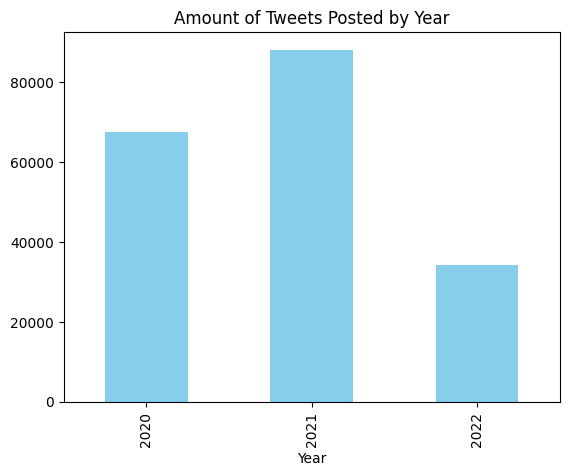

In [11]:
plot1.plot(kind='bar', color='skyblue')
plt.title('Amount of Tweets Posted by Year')
plt.xlabel('Year')
plt.ylabel('')

plt.show()

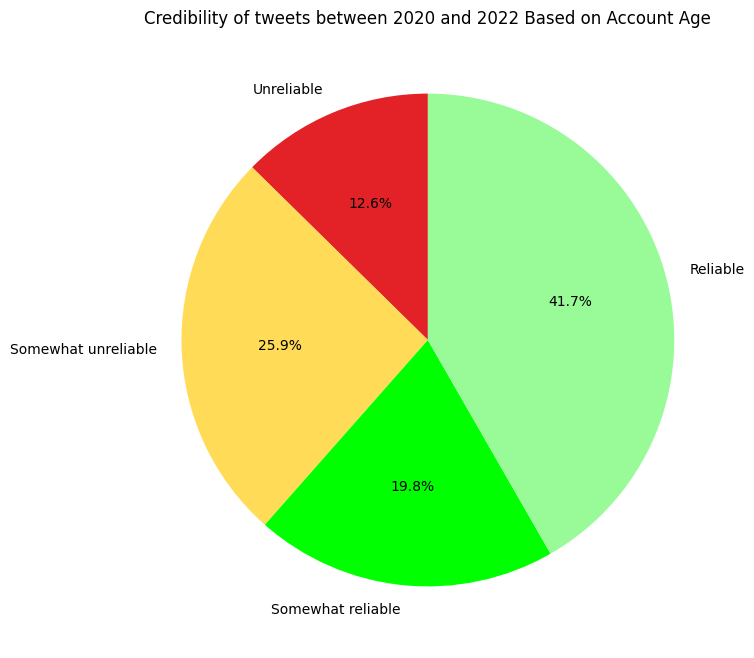

In [12]:
data['acc_age'] = data['acc_age'].fillna(0).astype(int)
data['credit'] = data['acc_age'].apply(credibility)
# print(data['credit'].head(15))

plot2 = data.groupby('credit').size().reset_index(name='credit_count')

plt.figure(figsize=(8, 8)) 
hue = ['#E32227', '#FFDB58', '#00FF00', '#98fb98']
plt.pie(plot2['credit_count'], labels=['Unreliable', 'Somewhat unreliable', 'Somewhat reliable', 'Reliable'],
        autopct='%1.1f%%', startangle=90, colors=hue)
plt.title('Credibility of tweets between 2020 and 2022 Based on Account Age')
plt.show()

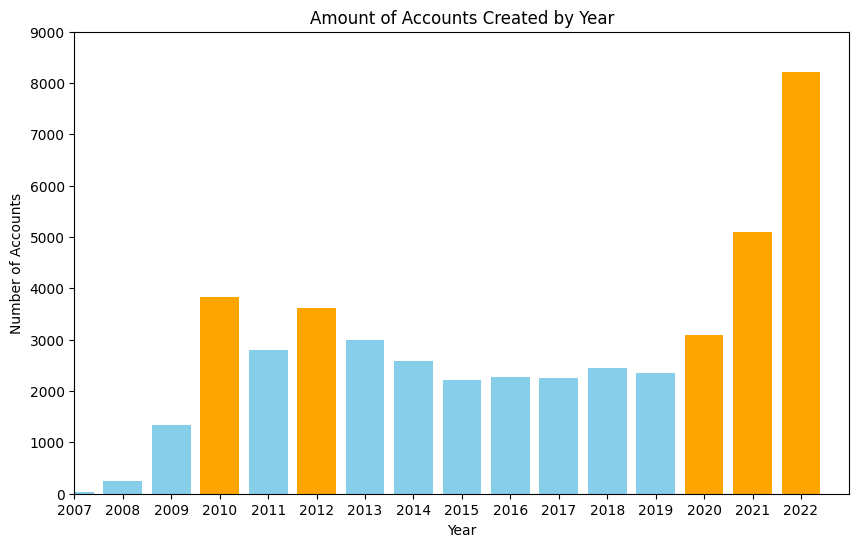

In [13]:
def year(days):
    downl_year = 2023
    if days <= 0 or days > max_age:
        return 0
    yr_count = days / 365
    yr = downl_year - yr_count
    return int(yr)

data['yr_created'] = data['acc_age'].apply(year)

plot3 = data.groupby('yr_created')['userid'].size().reset_index(name='acc_count')
top5_yr = plot3.nlargest(6, 'acc_count')['yr_created']
colors = ['skyblue' if yr not in top5_yr.values else 'orange' for yr in plot3['yr_created']]

plt.figure(figsize=(10, 6))
plt.bar(plot3['yr_created'], plot3['acc_count'], color= colors)
plt.title('Amount of Accounts Created by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')
plt.xlim(2007, 2023)
plt.ylim(0, 9000)
plt.xticks(range(2007, 2023, 1))

plt.show()

## Question:
What are alternative factors we can take into account, and what statistics would be helpful for our analysis? How should we incorporate major events such as #BLM and #StopAsianHate into our project?

In [ ]:
def ddmmyyyy(date):
    x = datetime.strptime(date, '%a %b %d %H:%M:%S %z %Y')
    x = x.strftime('%d-%m-%Y')
    return x


data['date2'] = data['date'].apply(ddmmyyyy)
data['date2'] = pd.to_datetime(data['date2'], format='%d-%m-%Y')
start_date = datetime.strptime("20-07-2021", "%d-%m-%Y")
end_date = datetime.strptime("30-08-2021", "%d-%m-%Y")
daily_tweets = data

# Date filter
# daily_tweets = data[data['date2'].between(start_date, end_date)]

# Find tweet count for each day
daily_tweets = daily_tweets.resample('D', on='date2').size().reset_index(name='tweet_count')

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(daily_tweets['date2'], daily_tweets['tweet_count'], label='Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()

#World events
events = pd.DataFrame([{'Health Emergency': '30-01-2020', 'George Floyd Passes Away': '05-25-2020',
                        'Atlanta Shootings': '16-03-2021', 'Pandemic': '03-11-2020', 'OMICRON Variant': '24-11-2021',
                        'Calgary Vigil': '06-06-2020', 'Gov Jay Inslee': '29-02-2020',
                        'Chauvin for New Trial': '05-05-2021', 'Trump COVID-19': '10-02-2020',
                        'DELTA Variant': '06-15-2021', 'Legislation COVID-19': '04-22-2021'}])

# Y-axis range calculation for text placement
y_min, y_max = plt.ylim()
y_text_placement = y_max + (y_max - y_min) * 0.05  # Adjusting text placement above the top

# Overlay each event
for event, date in events.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='purple', linestyle='--', linewidth=1)
    plt.text(date, y_text_placement, event, rotation=90, verticalalignment='bottom', horizontalalignment='right',
             color='purple', fontsize=9)

plt.legend()
plt.show()